## Importing libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Classifying algorithm libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation metrics libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Model exporting libraries
import pickle

## Loading the dataset files

### Dataset files: [Link](https://github.com/smartinternz02/SI-GuidedProject-597923-1697379106/blob/main/Resources/Dataset)

### Get the dataset

In [2]:
# Getting the CSV files as dataframes
df1 = pd.read_csv('/content/1year.csv', na_values='?')
df2 = pd.read_csv('/content/2year.csv', na_values='?')
df3 = pd.read_csv('/content/3year.csv', na_values='?')
df4 = pd.read_csv('/content/4year.csv', na_values='?')
df5 = pd.read_csv('/content/5year.csv', na_values='?')

In [3]:
# Dimensions of all the dataframes
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(7012, 65)
(10173, 65)
(10476, 65)
(9539, 65)
(5427, 65)


### Creating a single dataframe using all the data files

* Checking if every CSV file has the same columns and if it is feasible to concatenate the files.

In [4]:
(
    list(df1.columns)
    == list(df2.columns)
    == list(df3.columns)
    == list(df4.columns)
    == list(df5.columns)
)

True

* Since, all columns names are identical, we can go ahead and append all CSV files together.

In [5]:
# Concatenate all dataframes
df = pd.concat(
    [df1, df2, df3, df4, df5],
    ignore_index = True
)

# Print the values
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [6]:
df.shape

(42627, 65)

## Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42627 entries, 0 to 42626
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   42619 non-null  float64
 1   Attr2   42619 non-null  float64
 2   Attr3   42619 non-null  float64
 3   Attr4   42494 non-null  float64
 4   Attr5   42540 non-null  float64
 5   Attr6   42619 non-null  float64
 6   Attr7   42619 non-null  float64
 7   Attr8   42533 non-null  float64
 8   Attr9   42618 non-null  float64
 9   Attr10  42619 non-null  float64
 10  Attr11  42584 non-null  float64
 11  Attr12  42494 non-null  float64
 12  Attr13  42501 non-null  float64
 13  Attr14  42619 non-null  float64
 14  Attr15  42591 non-null  float64
 15  Attr16  42532 non-null  float64
 16  Attr17  42533 non-null  float64
 17  Attr18  42619 non-null  float64
 18  Attr19  42500 non-null  float64
 19  Attr20  42501 non-null  float64
 20  Attr21  36784 non-null  float64
 21  Attr22  42619 non-null  float64
 22

### Dropping columns with large numbers of missing values

In [8]:
columns_to_be_dropped = [
    col for col in df.columns if df[col].isnull().sum() >= (0.2 * df.shape[0])
]

print(f"\n\nDrop the following columns: {columns_to_be_dropped}\n\n")



Drop the following columns: ['Attr37']




In [9]:
df = df.drop(
    columns = columns_to_be_dropped,
    axis = 1
)

df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [10]:
df.shape

(42627, 64)

* The shape of the dataset changed from (42627, 65) to (42627, 64).
* This implies that one of the columns contained missing/null values more than or equal to 20% of the length of the column.

### Replacing missing values

In [11]:
df.isnull().sum().sum()

21861

In [12]:
for col_name, col_data in df.items():
    if df[col_name].isnull().sum() > 0:
        # Replacing missing values with median
        df[col_name] = df[col_name].fillna(df[col_name].median())

In [13]:
df.isnull().sum().sum()

0

* We can see that there are no more null values remaining in the dataset.

## Data Visualization

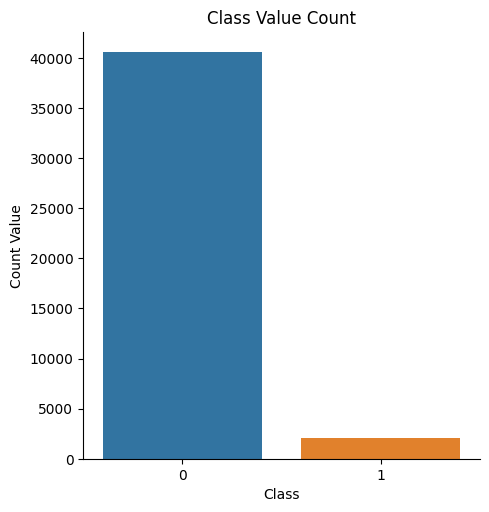

In [14]:
sns.catplot(data = df, x = 'class', kind = 'count')

plt.xlabel('Class')
plt.ylabel('Count Value')
plt.title('Class Value Count')

plt.show()

* This plot gives us an idea about the distribution of the different classes.
* We can see that the data is classified into 2 different classes.
* We can also understand that the data is highly imbalanced in favor of class 0.
* This implies that we need to make use of balancing techniques to balance the data.

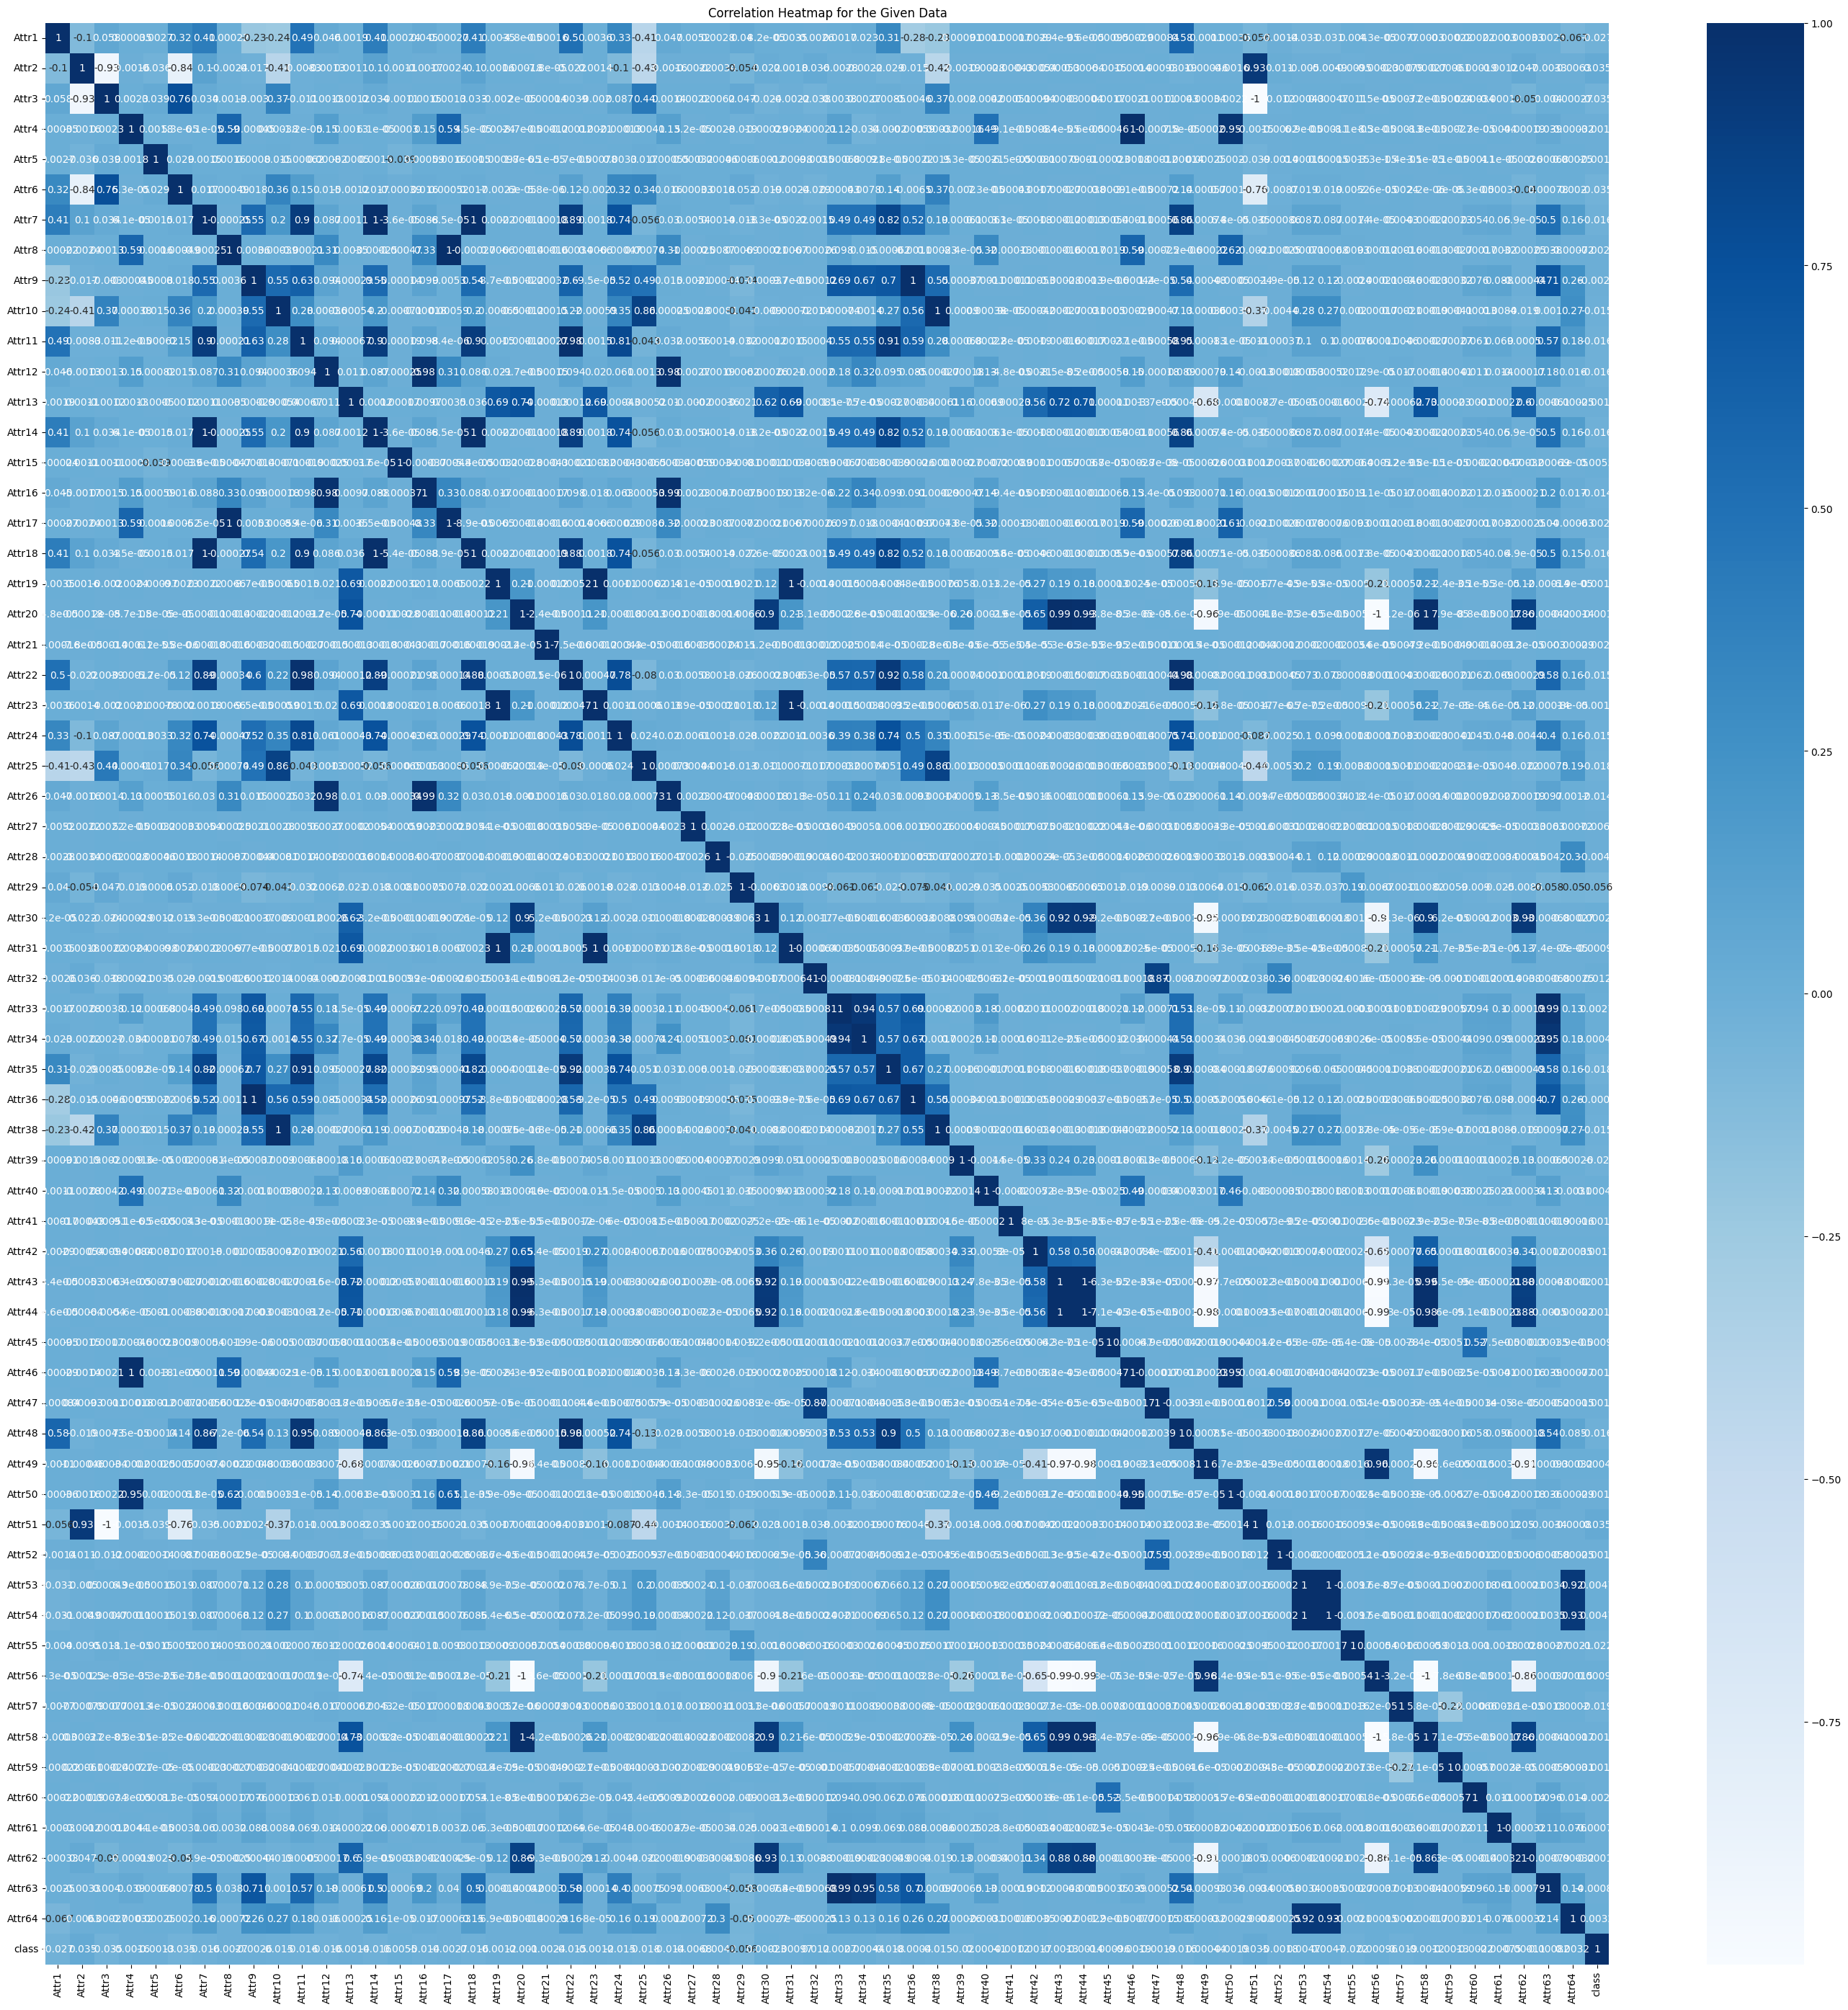

In [15]:
plt.figure(figsize = [35, 35])

sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

plt.title('Correlation Heatmap for the Given Data')
plt.show()

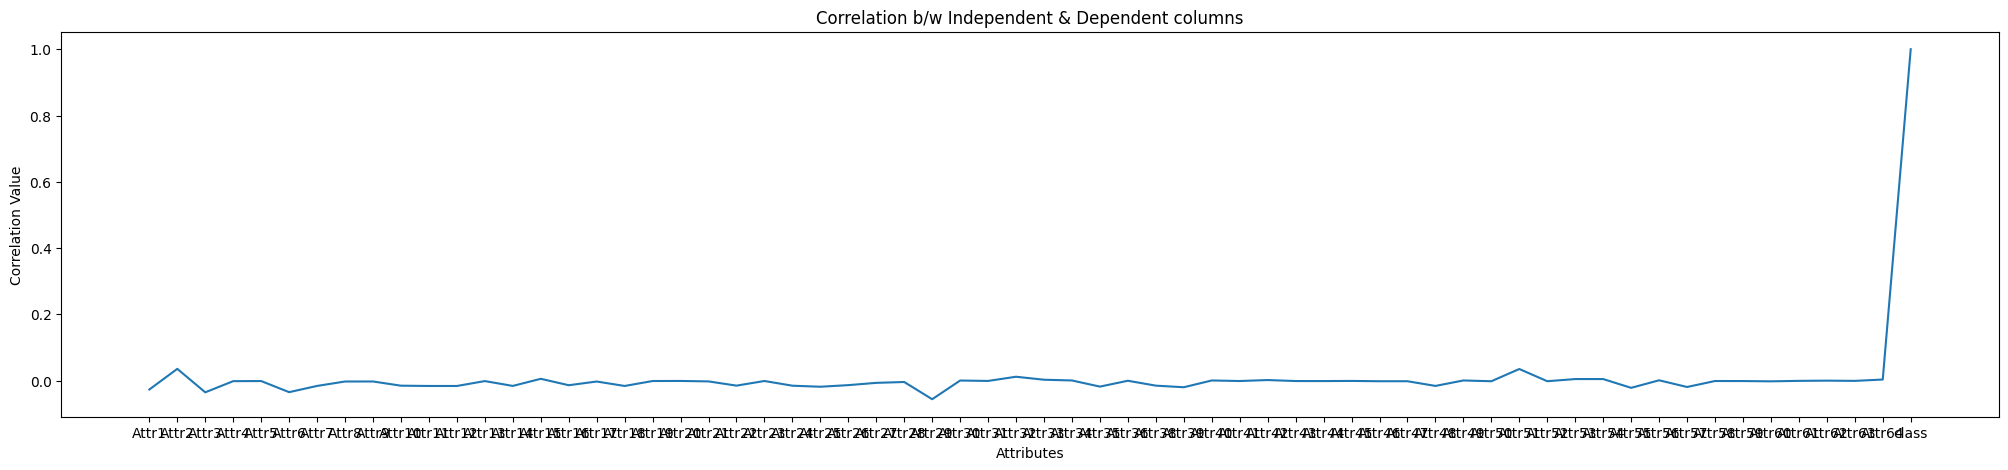

In [16]:
plt.figure(figsize = [25, 5])

sns.lineplot(df.corr()['class'])

plt.xlabel('Attributes')
plt.ylabel('Correlation Value')
plt.title('Correlation b/w Independent & Dependent columns')
plt.show()

## X and y splitting

In [17]:
# Dependent variable
y = df['class']
(y)

0        0
1        0
2        0
3        0
4        0
        ..
42622    1
42623    1
42624    1
42625    1
42626    1
Name: class, Length: 42627, dtype: int64

In [18]:
# Independent variables
x = df.drop(columns = ['class'], axis = 1)
(x)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42622,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990
42623,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-9242.10,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050
42624,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,-58253.00,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270
42625,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,1107.50,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575


## Feature Selection

### Decision Tree Classifier

In [19]:
# Create a classifier
dtc = DecisionTreeClassifier()

In [20]:
# Create a feature selection object
rfe_dtc = RFE(estimator = dtc, n_features_to_select = 10)

In [21]:
# Fit the feature selection object to the data
rfe_dtc.fit(x, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [22]:
# Create a list of all selected features
dtc_selected_features = []

for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_dtc.support_[i]:
        dtc_selected_features.append(col)

In [23]:
# Print the selected features
print("\n\n")
print("Decision Tree Classifier :")
print("\n")
print(dtc_selected_features)
print("\n\n")




Decision Tree Classifier :


['Attr4', 'Attr5', 'Attr20', 'Attr27', 'Attr34', 'Attr41', 'Attr46', 'Attr56', 'Attr58', 'Attr61']





### Random Forest Classifier

In [24]:
# Create a classifier
rfc = RandomForestClassifier()

In [25]:
# Create a feature selection object
rfe_rfc = RFE(estimator = rfc, n_features_to_select = 10)

In [26]:
# Fit the feature selection object to the data
rfe_rfc.fit(x, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [27]:
# Create a list of all selected features
rfc_selected_features = []

for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_rfc.support_[i]:
        rfc_selected_features.append(col)

In [28]:
# Print the selected features
print("\n\n")
print("Random Forest Classifier :")
print("\n")
print(rfc_selected_features)
print("\n\n")




Random Forest Classifier :


['Attr5', 'Attr9', 'Attr24', 'Attr27', 'Attr34', 'Attr39', 'Attr41', 'Attr46', 'Attr56', 'Attr58']





### XGB Classifier

In [29]:
# Create a classifier
xgb = XGBClassifier()

In [30]:
# Create a feature selection object
rfe_xgb = RFE(estimator = xgb, n_features_to_select = 10)

In [31]:
# Fit the feature selection object to the data
rfe_xgb.fit(x, y)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=None,
                            num_parallel_tree=None, random_state=None, ...),
    n_features_to_select=10)

In [32]:
# Create a list of all selected features
xgb_selected_features = []

for i, col in zip(range(x.shape[1]), x.columns):
    if rfe_xgb.support_[i]:
        xgb_selected_features.append(col)

In [33]:
# Print the selected features
print("\n\n")
print("XGB Classifier :")
print("\n")
print(xgb_selected_features)
print("\n\n")




XGB Classifier :


['Attr5', 'Attr6', 'Attr26', 'Attr27', 'Attr34', 'Attr35', 'Attr42', 'Attr46', 'Attr56', 'Attr58']





## Train test split

In [34]:
def train_test_splitting(x, y):
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        test_size = 0.2,
        random_state = 42
    )

    return x_train, x_test, y_train, y_test

In [35]:
dtc_x_train, dtc_x_test, dtc_y_train, dtc_y_test = train_test_splitting(
    y = y,
    x = x.drop(
        columns = [col for col in x if col not in dtc_selected_features],
        axis = 1
    )
)

In [36]:
rfc_x_train, rfc_x_test, rfc_y_train, rfc_y_test = train_test_splitting(
    y = y,
    x = x.drop(
        columns = [col for col in x if col not in rfc_selected_features],
        axis = 1
    )
)

In [37]:
xgb_x_train, xgb_x_test, xgb_y_train, xgb_y_test = train_test_splitting(
    y = y,
    x = x.drop(
        columns = [col for col in x if col not in xgb_selected_features],
        axis = 1
    )
)

## Handling imbalanced data

In [38]:
def balance_data(x_train, y_train):
    smote = SMOTE()
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
    return x_train_smote, y_train_smote

In [39]:
dtc_x_train_smote, dtc_y_train_smote = balance_data(
    x_train = dtc_x_train,
    y_train = dtc_y_train
)

In [40]:
rfc_x_train_smote, rfc_y_train_smote = balance_data(
    x_train = rfc_x_train,
    y_train = rfc_y_train
)

In [41]:
xgb_x_train_smote, xgb_y_train_smote = balance_data(
    x_train = xgb_x_train,
    y_train = xgb_y_train
)

## Building the models

### Decision Tree Classifier

In [42]:
# Initialize the model
dtc_classifier = DecisionTreeClassifier()

In [43]:
# Fitting the data on the model
dtc_classifier.fit(dtc_x_train_smote, dtc_y_train_smote)

DecisionTreeClassifier()

In [44]:
# Get the predictions
dtc_prediction = dtc_classifier.predict(dtc_x_test)
dtc_train_prediction = dtc_classifier.predict(dtc_x_train)

In [45]:
pd.crosstab(dtc_y_test, dtc_prediction)

col_0,0,1
class,,
0,7360,751
1,128,287


In [46]:
print(classification_report(dtc_y_test, dtc_prediction))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8111
           1       0.28      0.69      0.40       415

    accuracy                           0.90      8526
   macro avg       0.63      0.80      0.67      8526
weighted avg       0.95      0.90      0.92      8526



In [47]:
# Accuracies
dtc_test_acc = accuracy_score(dtc_y_test, dtc_prediction)
dtc_train_acc = accuracy_score(dtc_y_train, dtc_train_prediction)

print(f"Test Accuracy = {dtc_test_acc}")
print(f"Train Accuracy = {dtc_train_acc}")

Test Accuracy = 0.8969035890218157
Train Accuracy = 1.0


### Random Forest Classifier

In [48]:
# Initialize the model
rfc_classifier = RandomForestClassifier(n_estimators = 300)

In [49]:
# Fitting the data on the model
rfc_classifier.fit(rfc_x_train_smote, rfc_y_train_smote)

RandomForestClassifier(n_estimators=300)

In [50]:
# Get the predictions
rfc_prediction = rfc_classifier.predict(rfc_x_test)
rfc_train_prediction = rfc_classifier.predict(rfc_x_train)

In [51]:
pd.crosstab(rfc_y_test, rfc_prediction)

col_0,0,1
class,,
0,7830,281
1,127,288


In [52]:
print(classification_report(rfc_y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8111
           1       0.51      0.69      0.59       415

    accuracy                           0.95      8526
   macro avg       0.75      0.83      0.78      8526
weighted avg       0.96      0.95      0.96      8526



In [53]:
# Accuracies
rfc_test_acc = accuracy_score(rfc_y_test, rfc_prediction)
rfc_train_acc = accuracy_score(rfc_y_train, rfc_train_prediction)

print(f"Test Accuracy = {rfc_test_acc}")
print(f"Train Accuracy = {rfc_train_acc}")

Test Accuracy = 0.952146375791696
Train Accuracy = 1.0


### XGB Classifier

In [54]:
# Initialize the model
xgb_classifier = XGBClassifier(max_depth = 8)

In [55]:
# Fitting the data on the model
xgb_classifier.fit(xgb_x_train_smote, xgb_y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
# Get the predictions
xgb_prediction = xgb_classifier.predict(xgb_x_test)
xgb_train_prediction = xgb_classifier.predict(xgb_x_train)

In [57]:
pd.crosstab(xgb_y_test, xgb_prediction)

col_0,0,1
class,,
0,7809,302
1,125,290


In [58]:
print(classification_report(xgb_y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8111
           1       0.49      0.70      0.58       415

    accuracy                           0.95      8526
   macro avg       0.74      0.83      0.77      8526
weighted avg       0.96      0.95      0.95      8526



In [59]:
# Accuracies
xgb_test_acc = accuracy_score(xgb_y_test, xgb_prediction)
xgb_train_acc = accuracy_score(xgb_y_train, xgb_train_prediction)

print(f"Test Accuracy = {xgb_test_acc}")
print(f"Train Accuracy = {xgb_train_acc}")

Test Accuracy = 0.9499178981937603
Train Accuracy = 0.9955719773613677


## Performance Evaluation

In [60]:
pd.DataFrame({
    'Model': [
        'Decision Tree','Random Forest','XGBoost'
    ],
    'Test Accuracy': [
        round(dtc_test_acc * 100, 2),
        round(rfc_test_acc * 100, 2),
        round(xgb_test_acc * 100, 2)
    ],
    'Train Accuracy': [
        round(dtc_train_acc * 100, 2),
        round(rfc_train_acc * 100, 2),
        round(xgb_train_acc * 100, 2)
    ],
    'Selected Features': [
        dtc_selected_features,
        rfc_selected_features,
        xgb_selected_features
    ]
})

,Model,Test Accuracy,Train Accuracy,Selected Features
0,Decision Tree,89.69,100.00,"[Attr4, Attr5, Attr20, Attr27, Attr34, Attr41,..."
1,Random Forest,95.21,100.00,"[Attr5, Attr9, Attr24, Attr27, Attr34, Attr39,..."
2,XGBoost,94.99,99.56,"[Attr5, Attr6, Attr26, Attr27, Attr34, Attr35,..."


## Testing the model

In [62]:
bankrupt = xgb_classifier.predict([[
    38.803, 46.705, 2.872, 0.59628, 0.2375,
    0.053954, 1.2819, 0.22599, 0.77401, 3.1534
]])[0]

In [63]:
if bankrupt:
    print("The company is likely to go BANKRUPT.")
else:
    print("The company is SAFE.")

The company is SAFE.


## Exporting the model

In [64]:
pickle.dump(xgb_classifier, open('predictor.pkl', 'wb'))